In [1]:
import pandas as pd
from google.colab import drive
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/MyDrive/matroskin/prepared_data.csv') #импортируем подготовленные для регрессии данные приюта Матроскин
df

,Unnamed: 0,date,text,comments.count,likes.count,reposts.count,views.count,id,hour,day_of_week,...,sentiment_score_positive,cluster_name_Мероприятия и акции в поддержку животных,cluster_name_Особенные случаи и истории болезни,cluster_name_Поиск дома для отдельных котиков,cluster_name_Помощь приютам и благотворительность,"cluster_name_Прощания, память и истории",cluster_name_Распределение и поиск новых хозяев,cluster_name_Социальные проекты и просветительская работа,cluster_name_Теплые истории и забота о животных,cluster_name_Экстренная помощь и спасение животных
0,0,2025-08-29 13:11:54,Этого светлячка зовут Чапек. И каждую минуту е...,2.0,99.0,38.0,6018.0,267316,13,4,...,0,0,1,0,0,0,0,0,0,0
1,1,2025-09-03 10:01:06,Самый добрый фестиваль [club232253162|КОТОПЁC]...,0.0,12.0,2.0,147.0,267619,10,2,...,1,1,0,0,0,0,0,0,0,0
2,2,2025-09-03 08:00:00,#ищу_дом@matroskinperm \n \nПрекрасная Сиеста ...,0.0,42.0,2.0,419.0,267612,8,2,...,1,0,0,0,0,0,0,0,0,0
3,3,2025-09-03 06:00:00,Оказываем информационную помощь. Кошка не явля...,0.0,75.0,9.0,1090.0,267606,6,2,...,0,0,0,0,0,0,1,0,0,0
4,4,2025-09-02 12:00:00,#ищу_дом@matroskinperm \n \nЛюбопытная Феста и...,0.0,74.0,7.0,857.0,267583,12,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14058,20422,2017-01-02 15:05:12,"«Дельфины не любят развлекать зрителей, но дел...",0.0,24.0,7.0,1985.0,50007,15,0,...,1,0,0,0,0,0,0,1,0,0
14059,20423,2017-01-02 13:09:02,Юный Адольф надеется на встречу с самым лучшим...,3.0,30.0,7.0,1896.0,50005,13,0,...,1,0,0,0,0,0,0,0,1,0
14060,20424,2017-01-02 10:07:00,#ищу_дом@zzzperm \nЧерныш ждет доброе человече...,0.0,33.0,13.0,1926.0,50004,10,0,...,1,0,0,0,0,0,0,0,0,0
14061,20425,2017-01-02 08:12:01,"Очередное доказательство того, что коты — это ...",1.0,73.0,3.0,2812.0,50002,8,0,...,0,0,0,0,0,0,0,0,1,0


In [3]:
df.columns

Index(['Unnamed: 0', 'date', 'text', 'comments.count', 'likes.count',
       'reposts.count', 'views.count', 'id', 'hour', 'day_of_week', 'month',
       'is_weekend', 'textPreprocessed', 'adjectives', 'topic_cluster',
       'word_count', 'time_of_day_день', 'time_of_day_ночь',
       'time_of_day_утро', 'season_зима', 'season_лето', 'season_осень',
       'sentiment_score_neutral', 'sentiment_score_positive',
       'cluster_name_Мероприятия и акции в поддержку животных',
       'cluster_name_Особенные случаи и истории болезни',
       'cluster_name_Поиск дома для отдельных котиков',
       'cluster_name_Помощь приютам и благотворительность',
       'cluster_name_Прощания, память и истории',
       'cluster_name_Распределение и поиск новых хозяев',
       'cluster_name_Социальные проекты и просветительская работа',
       'cluster_name_Теплые истории и забота о животных',
       'cluster_name_Экстренная помощь и спасение животных'],
      dtype='object')

In [4]:
df = df[['date', 'text', 'comments.count', 'likes.count', 'reposts.count',
       'views.count', 'id', 'day_of_week', 'is_weekend','word_count',
       'time_of_day_день', 'time_of_day_ночь', 'time_of_day_утро',
       'season_зима', 'season_лето', 'season_осень', 'sentiment_score_neutral',
       'sentiment_score_positive',
       'cluster_name_Мероприятия и акции в поддержку животных',
       'cluster_name_Особенные случаи и истории болезни',
       'cluster_name_Поиск дома для отдельных котиков',
       'cluster_name_Помощь приютам и благотворительность',
       'cluster_name_Прощания, память и истории',
       'cluster_name_Распределение и поиск новых хозяев',
       'cluster_name_Социальные проекты и просветительская работа',
       'cluster_name_Теплые истории и забота о животных',
       'cluster_name_Экстренная помощь и спасение животных']]

In [5]:
df

,date,text,comments.count,likes.count,reposts.count,views.count,id,day_of_week,is_weekend,word_count,...,sentiment_score_positive,cluster_name_Мероприятия и акции в поддержку животных,cluster_name_Особенные случаи и истории болезни,cluster_name_Поиск дома для отдельных котиков,cluster_name_Помощь приютам и благотворительность,"cluster_name_Прощания, память и истории",cluster_name_Распределение и поиск новых хозяев,cluster_name_Социальные проекты и просветительская работа,cluster_name_Теплые истории и забота о животных,cluster_name_Экстренная помощь и спасение животных
0,2025-08-29 13:11:54,Этого светлячка зовут Чапек. И каждую минуту е...,2.0,99.0,38.0,6018.0,267316,4,0,349,...,0,0,1,0,0,0,0,0,0,0
1,2025-09-03 10:01:06,Самый добрый фестиваль [club232253162|КОТОПЁC]...,0.0,12.0,2.0,147.0,267619,2,0,301,...,1,1,0,0,0,0,0,0,0,0
2,2025-09-03 08:00:00,#ищу_дом@matroskinperm \n \nПрекрасная Сиеста ...,0.0,42.0,2.0,419.0,267612,2,0,135,...,1,0,0,0,0,0,0,0,0,0
3,2025-09-03 06:00:00,Оказываем информационную помощь. Кошка не явля...,0.0,75.0,9.0,1090.0,267606,2,0,81,...,0,0,0,0,0,0,1,0,0,0
4,2025-09-02 12:00:00,#ищу_дом@matroskinperm \n \nЛюбопытная Феста и...,0.0,74.0,7.0,857.0,267583,1,0,128,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14058,2017-01-02 15:05:12,"«Дельфины не любят развлекать зрителей, но дел...",0.0,24.0,7.0,1985.0,50007,0,0,717,...,1,0,0,0,0,0,0,1,0,0
14059,2017-01-02 13:09:02,Юный Адольф надеется на встречу с самым лучшим...,3.0,30.0,7.0,1896.0,50005,0,0,61,...,1,0,0,0,0,0,0,0,1,0
14060,2017-01-02 10:07:00,#ищу_дом@zzzperm \nЧерныш ждет доброе человече...,0.0,33.0,13.0,1926.0,50004,0,0,57,...,1,0,0,0,0,0,0,0,0,0
14061,2017-01-02 08:12:01,"Очередное доказательство того, что коты — это ...",1.0,73.0,3.0,2812.0,50002,0,0,8,...,0,0,0,0,0,0,0,0,1,0


In [6]:
df['engagement_level'] = (
    df['likes.count'] +
    df['comments.count'] +
    df['reposts.count']
) / df['views.count'] # Создадим зависимую переменную для регрессионного анализа

/tmp/ipython-input-1929840665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['engagement_level'] = (


In [7]:
# Проверка нормальности распределения engagement_level с помощью теста Колмогорова-Смирнова
d_statistic, p_value = stats.kstest(
    df['engagement_level'],
    'norm',
    args=(df['engagement_level'].mean(), df['engagement_level'].std(ddof=1))
)

print(f'D-статистика: {d_statistic:.4f}, p-value: {p_value:.4f}')

D-статистика: 0.0769, p-value: 0.0000


In [8]:
# Попробуем нормализовать переменную вовлеченности через логарифмирование
df['engagement_level_log'] = np.log(df['engagement_level'].dropna())

/tmp/ipython-input-913544005.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['engagement_level_log'] = np.log(df['engagement_level'].dropna())


In [9]:
d_statistic_log, p_value_log = stats.kstest(
    df['engagement_level_log'],
    'norm',
    args=(df['engagement_level_log'].mean(), df['engagement_level_log'].std())
)

print(f'D-статистика (log): {d_statistic_log:.4f}, p-value (log): {p_value_log:.4f}')

D-статистика (log): 0.0307, p-value (log): 0.0000


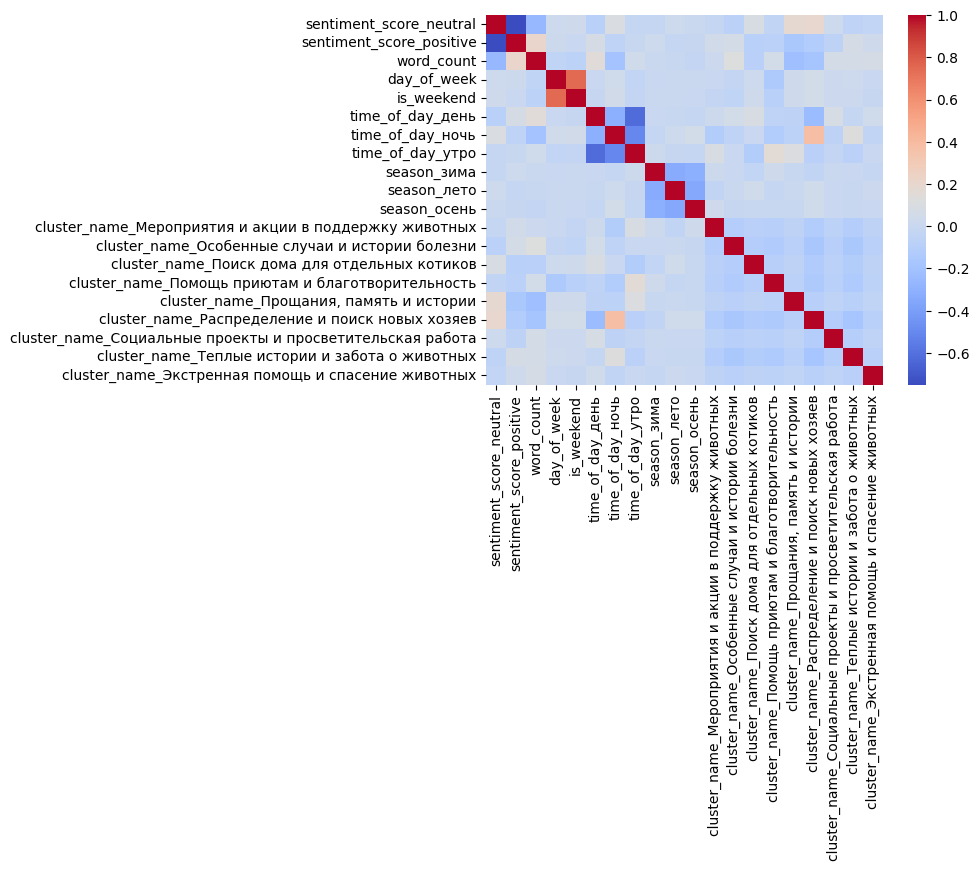

In [10]:
# проверимкорреляцию между переменными во избежание мультиколлинеарности
independent_vars = [
    'sentiment_score_neutral',
    'sentiment_score_positive',
    'word_count',
    'day_of_week',
    'is_weekend',
    'time_of_day_день',
    'time_of_day_ночь',
    'time_of_day_утро',
    'season_зима',
    'season_лето',
    'season_осень',
    'cluster_name_Мероприятия и акции в поддержку животных',
    'cluster_name_Особенные случаи и истории болезни',
    'cluster_name_Поиск дома для отдельных котиков',
    'cluster_name_Помощь приютам и благотворительность',
    'cluster_name_Прощания, память и истории',
    'cluster_name_Распределение и поиск новых хозяев',
    'cluster_name_Социальные проекты и просветительская работа',
    'cluster_name_Теплые истории и забота о животных',
    'cluster_name_Экстренная помощь и спасение животных'
]

corr_matrix = df[independent_vars].corr()


sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.show()

In [11]:
# Список признаков для регрессии
independent_vars = [
    'sentiment_score_neutral',
    'sentiment_score_positive',
    'word_count',
    'day_of_week',
    'time_of_day_день',
    'time_of_day_ночь',
    'time_of_day_утро',
    'season_зима',
    'season_лето',
    'season_осень',
    'cluster_name_Мероприятия и акции в поддержку животных',
       'cluster_name_Особенные случаи и истории болезни',
       'cluster_name_Поиск дома для отдельных котиков',
       'cluster_name_Помощь приютам и благотворительность',
       'cluster_name_Прощания, память и истории',
       'cluster_name_Распределение и поиск новых хозяев',
       'cluster_name_Социальные проекты и просветительская работа',
       'cluster_name_Теплые истории и забота о животных',
       'cluster_name_Экстренная помощь и спасение животных'
]

# Формируем матрицу признаков и целевую переменную
X = df[independent_vars]
y = df['engagement_level']

# Добавляем константу (intercept)
X = sm.add_constant(X)

# Создаем и обучаем модель
model = sm.OLS(y, X).fit()

# Выводим результаты регрессии
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       engagement_level   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     57.44
Date:                Sat, 20 Sep 2025   Prob (F-statistic):          4.84e-211
Time:                        16:29:34   Log-Likelihood:                 37587.
No. Observations:               14063   AIC:                        -7.513e+04
Df Residuals:                   14043   BIC:                        -7.498e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

In [12]:
# Список признаков для регрессии, которые статистически заничимы в предыдущем этапе
independent_vars = [
    'sentiment_score_neutral',
    'word_count',
    'day_of_week',
    'season_осень',
    'cluster_name_Мероприятия и акции в поддержку животных',
       'cluster_name_Особенные случаи и истории болезни',
       'cluster_name_Поиск дома для отдельных котиков',
       'cluster_name_Помощь приютам и благотворительность',
       'cluster_name_Прощания, память и истории',
       'cluster_name_Распределение и поиск новых хозяев',
       'cluster_name_Социальные проекты и просветительская работа',
       'cluster_name_Теплые истории и забота о животных',
       'cluster_name_Экстренная помощь и спасение животных'
]

# Формируем матрицу признаков и целевую переменную
X = df[independent_vars]
y = df['engagement_level']

# Добавляем константу (intercept)
X = sm.add_constant(X)

# Создаем и обучаем модель
model = sm.OLS(y, X).fit()

# Выводим результаты регрессии
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       engagement_level   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     81.08
Date:                Sat, 20 Sep 2025   Prob (F-statistic):          4.41e-209
Time:                        16:29:35   Log-Likelihood:                 37570.
No. Observations:               14063   AIC:                        -7.511e+04
Df Residuals:                   14049   BIC:                        -7.501e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

In [13]:
# Список признаков
features = [
    'sentiment_score_neutral',
    'sentiment_score_positive',
    'word_count',
    'day_of_week',
    'time_of_day_день',
    'time_of_day_ночь',
    'time_of_day_утро',
    'season_зима',
    'season_лето',
    'season_осень',
    'cluster_name_Мероприятия и акции в поддержку животных',
       'cluster_name_Особенные случаи и истории болезни',
       'cluster_name_Поиск дома для отдельных котиков',
       'cluster_name_Помощь приютам и благотворительность',
       'cluster_name_Прощания, память и истории',
       'cluster_name_Распределение и поиск новых хозяев',
       'cluster_name_Социальные проекты и просветительская работа',
       'cluster_name_Теплые истории и забота о животных',
       'cluster_name_Экстренная помощь и спасение животных'
]
X = df[features].values
y = df['engagement_level'].values

# Разбивка на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

# Создаём модель линейной регрессии
model = LinearRegression()

# Обучаем модель
model.fit(X_train, y_train)

# Предсказания на тесте
y_pred = model.predict(X_test)

# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R2 score: {r2:.4f}")

# Коэффициенты модели
coef_dict = dict(zip(features, model.coef_))
print("Коэффициенты признаков:")
for feature, coef in coef_dict.items():
    print(f"{feature}: {coef:.4f}")


RMSE: 0.0168
R2 score: 0.0674
Коэффициенты признаков:
sentiment_score_neutral: -0.0012
sentiment_score_positive: -0.0005
word_count: 0.0000
day_of_week: -0.0002
time_of_day_день: -0.0008
time_of_day_ночь: 0.0002
time_of_day_утро: 0.0010
season_зима: -0.0002
season_лето: -0.0001
season_осень: -0.0017
cluster_name_Мероприятия и акции в поддержку животных: -0.0108
cluster_name_Особенные случаи и истории болезни: -0.0028
cluster_name_Поиск дома для отдельных котиков: -0.0044
cluster_name_Помощь приютам и благотворительность: -0.0011
cluster_name_Прощания, память и истории: -0.0106
cluster_name_Распределение и поиск новых хозяев: 0.0027
cluster_name_Социальные проекты и просветительская работа: -0.0095
cluster_name_Теплые истории и забота о животных: -0.0070
cluster_name_Экстренная помощь и спасение животных: -0.0018


In [14]:
# Список признаков
features = [
    'sentiment_score_neutral',
    'word_count',
    'day_of_week',
    'season_осень',
    'cluster_name_Мероприятия и акции в поддержку животных',
       'cluster_name_Особенные случаи и истории болезни',
       'cluster_name_Поиск дома для отдельных котиков',
       'cluster_name_Помощь приютам и благотворительность',
       'cluster_name_Прощания, память и истории',
       'cluster_name_Распределение и поиск новых хозяев',
       'cluster_name_Социальные проекты и просветительская работа',
       'cluster_name_Теплые истории и забота о животных',
       'cluster_name_Экстренная помощь и спасение животных'
]
X = df[features].values
y = df['engagement_level'].values

# Разбивка на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

# Создаём модель линейной регрессии
model = LinearRegression()

# Обучаем модель
model.fit(X_train, y_train)

# Предсказания на тесте
y_pred = model.predict(X_test)

# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R2 score: {r2:.4f}")

# Коэффициенты модели
coef_dict = dict(zip(features, model.coef_))
print("Коэффициенты признаков:")
for feature, coef in coef_dict.items():
    print(f"{feature}: {coef:.4f}")

RMSE: 0.0168
R2 score: 0.0640
Коэффициенты признаков:
sentiment_score_neutral: -0.0008
word_count: 0.0000
day_of_week: -0.0002
season_осень: -0.0016
cluster_name_Мероприятия и акции в поддержку животных: -0.0105
cluster_name_Особенные случаи и истории болезни: -0.0027
cluster_name_Поиск дома для отдельных котиков: -0.0045
cluster_name_Помощь приютам и благотворительность: -0.0006
cluster_name_Прощания, память и истории: -0.0101
cluster_name_Распределение и поиск новых хозяев: 0.0031
cluster_name_Социальные проекты и просветительская работа: -0.0094
cluster_name_Теплые истории и забота о животных: -0.0069
cluster_name_Экстренная помощь и спасение животных: -0.0017


Попробуем построить регрессию, где в качестве зависмой переменной натуральный логарифм вовлеченности

In [15]:
# Список признаков для регрессии
independent_vars = [
    'sentiment_score_neutral',
    'sentiment_score_positive',
    'word_count',
    'day_of_week',
    'time_of_day_день',
    'time_of_day_ночь',
    'time_of_day_утро',
    'season_зима',
    'season_лето',
    'season_осень',
    'cluster_name_Мероприятия и акции в поддержку животных',
       'cluster_name_Особенные случаи и истории болезни',
       'cluster_name_Поиск дома для отдельных котиков',
       'cluster_name_Помощь приютам и благотворительность',
       'cluster_name_Прощания, память и истории',
       'cluster_name_Распределение и поиск новых хозяев',
       'cluster_name_Социальные проекты и просветительская работа',
       'cluster_name_Теплые истории и забота о животных',
       'cluster_name_Экстренная помощь и спасение животных'
]

# Формируем матрицу признаков и целевую переменную
X = df[independent_vars]
y = df['engagement_level_log']

# Добавляем константу (intercept)
X = sm.add_constant(X)

# Создаем и обучаем модель
model = sm.OLS(y, X).fit()

# Выводим результаты регрессии
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     engagement_level_log   R-squared:                       0.100
Model:                              OLS   Adj. R-squared:                  0.099
Method:                   Least Squares   F-statistic:                     82.00
Date:                  Sat, 20 Sep 2025   Prob (F-statistic):          1.92e-302
Time:                          16:29:35   Log-Likelihood:                -6933.8
No. Observations:                 14063   AIC:                         1.391e+04
Df Residuals:                     14043   BIC:                         1.406e+04
Df Model:                            19                                         
Covariance Type:              nonrobust                                         
                                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [17]:
# Список признаков
features = [
    'sentiment_score_neutral',
    'sentiment_score_positive',
    'word_count',
    'day_of_week',
    'time_of_day_день',
    'time_of_day_ночь',
    'time_of_day_утро',
    'season_зима',
    'season_лето',
    'season_осень',
    'cluster_name_Мероприятия и акции в поддержку животных',
       'cluster_name_Особенные случаи и истории болезни',
       'cluster_name_Поиск дома для отдельных котиков',
       'cluster_name_Помощь приютам и благотворительность',
       'cluster_name_Прощания, память и истории',
       'cluster_name_Распределение и поиск новых хозяев',
       'cluster_name_Социальные проекты и просветительская работа',
       'cluster_name_Теплые истории и забота о животных',
       'cluster_name_Экстренная помощь и спасение животных'
]
X = df[features].values
y = df['engagement_level_log'].values

# Разбивка на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11)

# Создаём модель линейной регрессии
model = LinearRegression()

# Обучаем модель
model.fit(X_train, y_train)

# Предсказания на тесте
y_pred = model.predict(X_test)

# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R2 score: {r2:.4f}")

# Коэффициенты модели
coef_dict = dict(zip(features, model.coef_))
print("Коэффициенты признаков:")
for feature, coef in coef_dict.items():
    print(f"{feature}: {coef:.4f}")


RMSE: 0.3927
R2 score: 0.0916
Коэффициенты признаков:
sentiment_score_neutral: -0.0202
sentiment_score_positive: 0.0060
word_count: 0.0001
day_of_week: -0.0066
time_of_day_день: -0.0371
time_of_day_ночь: 0.0102
time_of_day_утро: 0.0228
season_зима: -0.0037
season_лето: 0.0077
season_осень: -0.0439
cluster_name_Мероприятия и акции в поддержку животных: -0.3308
cluster_name_Особенные случаи и истории болезни: -0.0747
cluster_name_Поиск дома для отдельных котиков: -0.1076
cluster_name_Помощь приютам и благотворительность: -0.0445
cluster_name_Прощания, память и истории: -0.2909
cluster_name_Распределение и поиск новых хозяев: 0.0716
cluster_name_Социальные проекты и просветительская работа: -0.2902
cluster_name_Теплые истории и забота о животных: -0.1916
cluster_name_Экстренная помощь и спасение животных: -0.0633


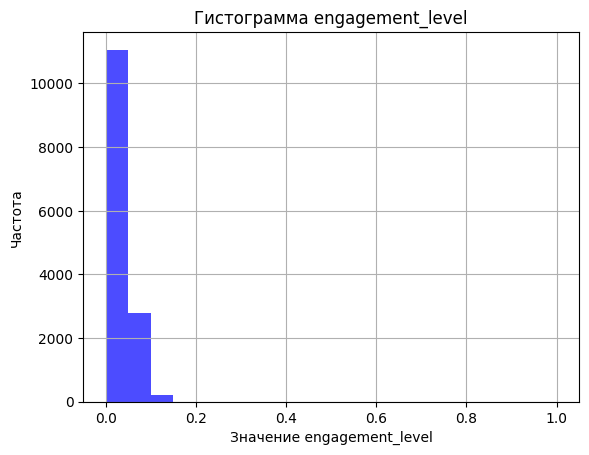

In [18]:
import matplotlib.pyplot as plt

plt.hist(df['engagement_level'], bins=20, range=(0, 1), color='blue', alpha=0.7)
plt.title('Гистограмма engagement_level')
plt.xlabel('Значение engagement_level')
plt.ylabel('Частота')
plt.grid(True)
plt.show()
